## 서울시 초미세먼지 농도 회귀분석

#### 2018111263 디지털미디어학과 신은주


미세먼지에 대한 관심이 높아지면서 미세먼지와 관련된 이야기 중 "날씨가 추워지면 미세먼지가 심해진다."라는 이야기를 들어보았고 이것이 진짜일지 궁금했습니다. 자료를 조사하던 중 실제로 날씨와 미세먼지의 상관관계가 있다는 연구결과도 있으며 환경부에 따르면 2차 생성 미세먼지 (가스 상태로 배출된 유해 물질이 공기 중에서 화학반응을 일으켜 변한 것)가 국내 초미세먼지의 원인 중 70% 이상을 차지하고 있음을 알 수 있었습니다.


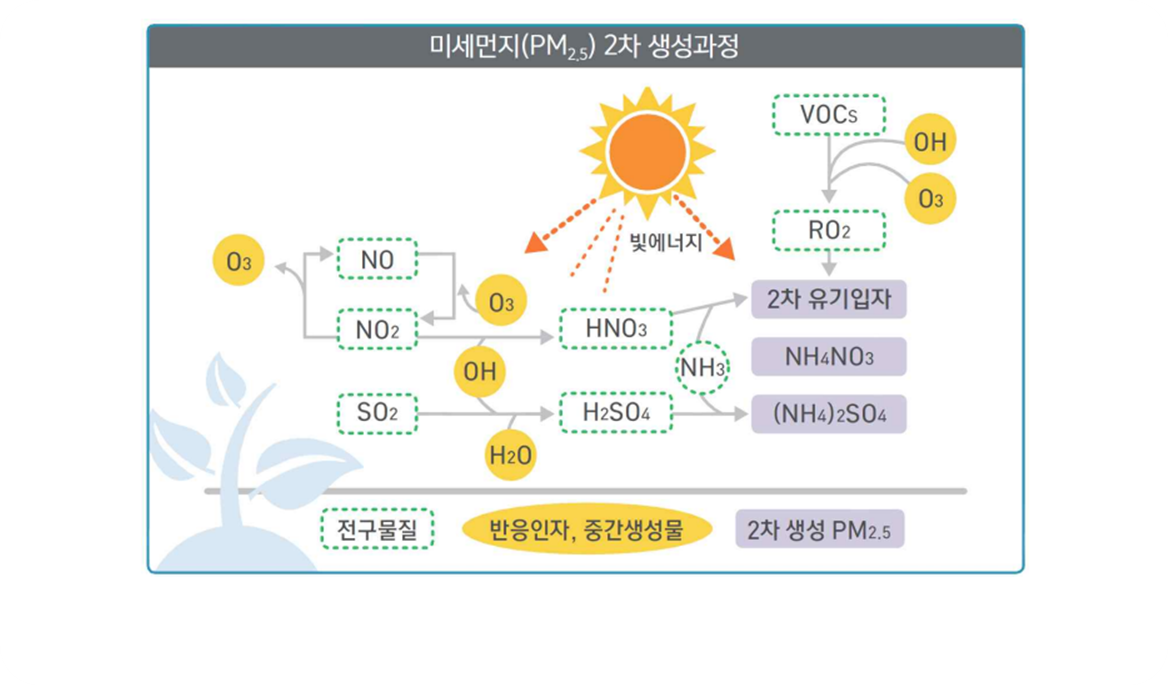
[환경부, 미세먼지 도대체 뭘까?, 2016.04]

이를 바탕으로 저는 미세먼지 농도를 날씨와 대기 오염물질로 회귀분석을 진행하였습니다.

아래는 데이터 셋에 대한 정보입니다.


Y : [서울열린 데이터 광장] 서울시 일별 평균 대기오염도 정보 중 초미세먼지 농도(PM2.5)

X : [서울열린 데이터 광장] 서울시 일별 평균 대기오염도 정보

    "일별평균대기오염도_2020.csv"
    
    Link : [http://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do]
    

    [기상자료개방포털] 방재기상관측 파일셋
    
    일자료,서울특별시,기간 2020년
    
    Link : [https://data.kma.go.kr/data/grnd/selectAwsRltmList.do?pgmNo=56&tabNo=1]


### 1. Library 가져오기:

In [1]:
### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np ### 수치계산을 위한 파이썬 라이브러리
import matplotlib.pyplot as plt ### 시각화를 위한 라이브러리
import seaborn as sns ### 시각화를 위한 라이브러리
%matplotlib inline 

#### 1-1. 사용할 데이터 셋 가져오기 : 2020년 방재기상관측(AWS) - 파일셋[기상청]
분석에 사용한 데이터셋은 크게 두가지로
첫번째는 서울시에서 제공하는 "서울시 일별 평균 대기오염도 정보" 2020년 자료이며
두번째는 기상청에서 제공하는 "방재기상관측(AWS)" 2020년 서울시 자료입니다.

df_air에 서울시 일별 평균 대기오염도 정보자료를 불러옵니다.

측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥) 를 속성으로 가지고 있습니다.


In [2]:
df_air=pd.read_csv("C:\\Users\\joo98\\Desktop\\BigDataAnalysis\\Average_daily_air_pollution_level_2020_220325.csv")

In [3]:
#데이터셋을 불러와서 첫 세 줄을 출력하여 데이터의 구성을 한 번 살펴볼게요.
df_air.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2020-01-01,강남구,0.037,0.003,0.7,0.003,30.0,22.0
1,2020-01-01,강동구,0.036,0.005,0.5,0.003,35.0,27.0
2,2020-01-01,강북구,0.045,0.004,0.6,0.003,40.0,26.0


방재기상관측데이터는 22개 구로 나뉘어져 있어 해당되는 파일을 모두 합한 후 각각의 지점코드를 측정소명으로 바꾸고 측정일시도 서울시 일별 평균 대기오염도 정보자료의 양식과 동일하게 바꾼 뒤 사용하지않을 데이터(시각)을 제외한 데이터 전처리과정을 거쳐 SURFACE_AWS_서울시_DAY_2020.csv 데이터 셋으로 만들었습니다.

df_weather에는 


측정소명,측정일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)를 속성으로 가지고 있습니다.

In [4]:
df_weather=pd.read_csv("C:\\Users\\joo98\\Desktop\\BigDataAnalysis\\SURFACE_AWS_서울시_DAY_2020.csv",encoding='cp949')

In [5]:
df_weather.head(3)

,측정소명,측정일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)
0,강남구,2020-01-01,-1.7,-5.1,1.0,0.0,3.4,0.9
1,강남구,2020-01-02,2.3,-0.2,5.1,0.0,5.7,1.0
2,강남구,2020-01-03,0.9,-2.7,6.0,0.0,6.0,1.1


In [6]:
df=pd.merge(df_air,df_weather)

In [7]:
df.head(3)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),이산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s)
0,2020-01-01,강남구,0.037,0.003,0.7,0.003,30.0,22.0,-1.7,-5.1,1.0,0.0,3.4,0.9
1,2020-01-01,강동구,0.036,0.005,0.5,0.003,35.0,27.0,-2.7,-5.9,0.0,0.0,4.6,1.0
2,2020-01-01,강북구,0.045,0.004,0.6,0.003,40.0,26.0,-2.2,-5.9,0.5,0.0,3.7,0.9


두 파일을 측정소명과 측정일시를 기준으로 merge를 진행했습니다. 

df의 첫 행을 확인해보면 각 데이터가 잘 병합되었음을 확인 할 수 있었습니다.

또한 데이터 셋의 속성들에 접근을 쉽게 하기위해 명칭을 영문으로 변경하였습니다.

In [8]:
#데이터셋 열 이름을 접근하기 쉽도록 영문으로 변경해줍니다.
df.columns = ['DATE', 'POS', 'NO2','O3','CO2','SO2','PM10','PM2.5','MTEM','LTEM','HTEM','PRE','HWS','MHS']

#### 2. 데이터 탐색하기 (EDA: Exploratory Data Analysis)

병합된 두 데이터 셋의 각 변수(features, attributes, columns, x들)의 기본 정보 및 각 변수의 특성을 살펴보겠습니다.

각 변수의 의미는 아래와 같습니다

1. DATE: 측정일자
2. POS: 측정장소
3. NO2: 이산화질소농도(ppm)
4. O3: 오존농도(ppm)
5. CO2: 이산화탄소농도(ppm)
6. SO2: 아황산가스(ppm)
7. PM10: 미세먼지(㎍/㎥)
8. PM2.5: 초미세먼지(㎍/㎥)
9. MTEM: 평균기온(°C)
10. LTEM: 최저기온(°C)
11. HTEM: 최고기온(°C)
12. PRE: 일강수량(mm)
13. HWS: 최대 순간 풍속(m/s)
14. MHS: 평균 풍속(m/s)

In [9]:
df.shape

(8005, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8005 entries, 0 to 8004
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8005 non-null   object 
 1   POS     8005 non-null   object 
 2   NO2     7995 non-null   float64
 3   O3      7999 non-null   float64
 4   CO2     7998 non-null   float64
 5   SO2     8000 non-null   float64
 6   PM10    8001 non-null   float64
 7   PM2.5   8002 non-null   float64
 8   MTEM    7936 non-null   float64
 9   LTEM    7938 non-null   float64
 10  HTEM    7938 non-null   float64
 11  PRE     7995 non-null   float64
 12  HWS     7955 non-null   float64
 13  MHS     7938 non-null   float64
dtypes: float64(12), object(2)
memory usage: 938.1+ KB


DATE,POS 속성 두가지를 제외한 모든 속성이 숫자형 데이터 임과 각각의 Non_Null 수가 다름을 확인할 수 있었습니다.

In [11]:
df.isnull().sum()

DATE      0
POS       0
NO2      10
O3        6
CO2       7
SO2       5
PM10      4
PM2.5     3
MTEM     69
LTEM     67
HTEM     67
PRE      10
HWS      50
MHS      67
dtype: int64

In [12]:
# 결측치가 있는 행을 삭제합니다.
df = df.dropna(axis=0)

In [13]:
df.isnull().sum()

DATE     0
POS      0
NO2      0
O3       0
CO2      0
SO2      0
PM10     0
PM2.5    0
MTEM     0
LTEM     0
HTEM     0
PRE      0
HWS      0
MHS      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7882 entries, 0 to 8004
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    7882 non-null   object 
 1   POS     7882 non-null   object 
 2   NO2     7882 non-null   float64
 3   O3      7882 non-null   float64
 4   CO2     7882 non-null   float64
 5   SO2     7882 non-null   float64
 6   PM10    7882 non-null   float64
 7   PM2.5   7882 non-null   float64
 8   MTEM    7882 non-null   float64
 9   LTEM    7882 non-null   float64
 10  HTEM    7882 non-null   float64
 11  PRE     7882 non-null   float64
 12  HWS     7882 non-null   float64
 13  MHS     7882 non-null   float64
dtypes: float64(12), object(2)
memory usage: 923.7+ KB


결측치를 확인한 후 결측치가 있는 행은 제거하도록 하였습니다.

아래는 결측치를 제거한 후 데이터 셋에 대한 데이터 요약입니다. 

In [15]:
df.describe()

,NO2,O3,CO2,SO2,PM10,PM2.5,MTEM,LTEM,HTEM,PRE,HWS,MHS
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,0.024528,0.025538,0.469551,0.003086,35.205785,20.665440,13.367711,9.273522,18.238708,4.223738,7.004796,1.622291
std,0.074203,0.012658,0.181470,0.000919,18.180251,12.545902,9.562683,9.889597,9.661674,14.111782,2.522939,0.754350
min,0.000000,0.002000,0.100000,0.001000,3.000000,1.000000,-12.700000,-16.800000,-7.900000,0.000000,1.600000,0.100000
25%,0.014000,0.016000,0.300000,0.002000,22.000000,11.000000,5.500000,1.200000,9.900000,0.000000,5.200000,1.100000
50%,0.021000,0.024000,0.400000,0.003000,32.000000,18.000000,13.500000,8.600000,19.000000,0.000000,6.500000,1.500000
75%,0.031000,0.033000,0.600000,0.004000,46.000000,27.000000,22.100000,18.500000,26.600000,0.000000,8.300000,2.000000
max,6.523000,0.095000,1.400000,0.010000,150.000000,120.000000,31.300000,27.800000,37.100000,142.500000,25.200000,6.200000


In [16]:
num_pos=df['POS'].unique()
print(len(num_pos))

### pos 리스트를 출력해 봅니다.
num_pos

22


array(['강남구', '강동구', '강북구', '강서구', '관악구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '중구', '중랑구'], dtype=object)

#### 2-2 종속변수(타겟변수, y)의 탐색
PM2.5 : 초미세먼지를 타겟변수로 지정합니다. 
초미세먼지 농도에 따른 상태정보는 아래 에어코리아 정보처럼 ~15 좋음 ~35 보통 ~75 나쁨 75이상 매우나쁨으로 표현됩니다.

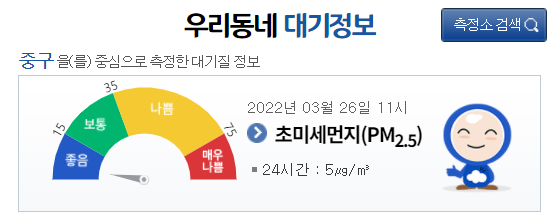
[출처 에어코리아 우리동네 대기정보]

In [17]:
df['PM2.5'].describe()

count    7882.000000
mean       20.665440
std        12.545902
min         1.000000
25%        11.000000
50%        18.000000
75%        27.000000
max       120.000000
Name: PM2.5, dtype: float64

In [18]:
## 해석: 2020년 서울시에서 미세먼지농도가 나쁨 이상이였던 날은 약 13퍼센트 입니다.
state_bad = df['PM2.5']>=35
state = df[state_bad].count()/df['PM2.5'].count()
state['PM2.5']

0.136513575234712

위 분석들을 통해 서울시의 2020년도의 미세먼지 평균 농도는 35.16으로 보통 수준이고 75%정도는 좋은 상태였다는 것과 약 13%정도는 나빴다는 점을 파악할 수 있습니다. 

<AxesSubplot:>

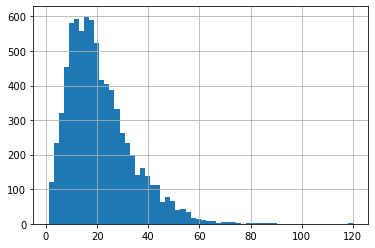

In [19]:
df['PM2.5'].hist(bins=60)

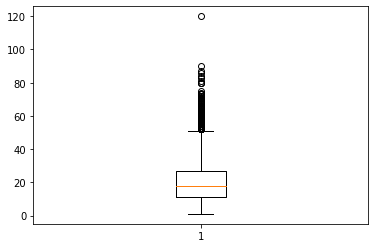

In [20]:
plt.boxplot(df['PM2.5'])
plt.show()

#### 2-3 설명변수(독립변수, features, attributes, x) 살펴보기
변수 설명

    DATE: 측정일자
    POS: 측정장소
1. NO2: 이산화질소농도(ppm)
2. O3: 오존농도(ppm)
3. CO2: 이산화탄소농도(ppm)
4. SO2: 아황산가스(ppm)
5. PM10: 미세먼지(㎍/㎥)
6. PM2.5: 초미세먼지(㎍/㎥)
7. MTEM: 평균기온(°C)
8. LTEM: 최저기온(°C)
9. HTEM: 최고기온(°C)
10. PRE: 일강수량(mm)
11. HWS: 최대 순간 풍속(m/s)
12. MHS: 평균 풍속(m/s)

C:\Users\joo98\AppData\Local\Temp/ipykernel_14004/944777608.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[numerical_columns].hist(ax=ax)


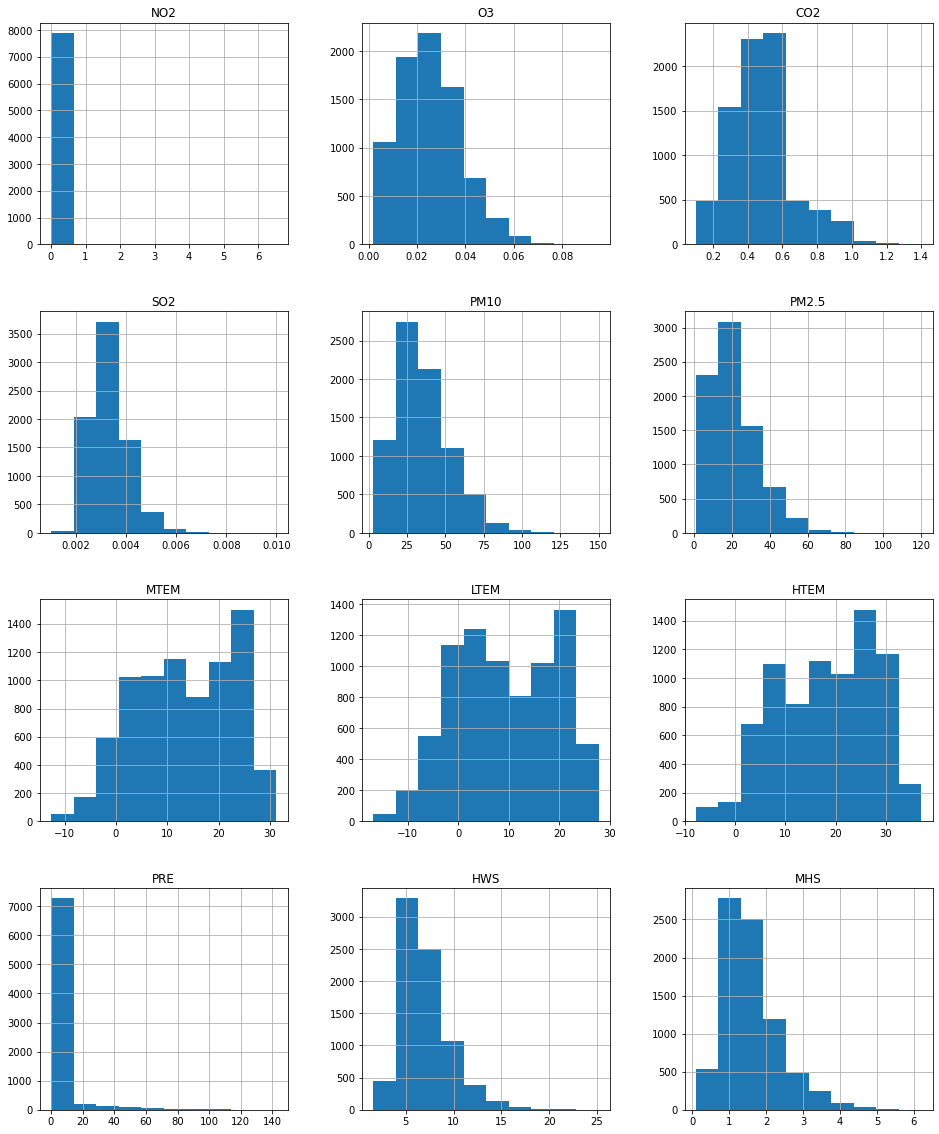

In [21]:
### numerical features(except "LON" & "LAT") :  LON, LAT: 해당 지역의 경도(Longitudes) 위도(Latitudes) 정보
numerical_columns=['NO2', 'O3', 'CO2' ,'SO2', 'PM10', 'PM2.5', 'MTEM', 'LTEM', 'HTEM', 'PRE', 'HWS' ,'MHS']

### figsize()는 plot()의 기본 크기를 지정합니다. 
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()  # Axes 생성

df[numerical_columns].hist(ax=ax)
plt.show()

In [22]:
### Pearson 상관계수 : 대표적으로 상관관계 분석을 진행합니다.

cols = ['PM2.5','PM10','NO2', 'O3', 'CO2' ,'SO2', 'MTEM', 'LTEM', 'HTEM', 'PRE', 'HWS' ,'MHS']
corr = df[cols].corr(method = 'pearson')
corr

,PM2.5,PM10,NO2,O3,CO2,SO2,MTEM,LTEM,HTEM,PRE,HWS,MHS
PM2.5,1.000000,0.864792,0.099443,-0.132780,0.691874,0.442721,-0.285020,-0.304890,-0.251229,-0.230820,-0.215954,-0.255289
PM10,0.864792,1.000000,0.084442,-0.028110,0.595128,0.432186,-0.292798,-0.327014,-0.249122,-0.282909,-0.114036,-0.148717
NO2,0.099443,0.084442,1.000000,-0.093976,0.105733,0.084351,-0.053443,-0.057010,-0.049945,-0.036230,-0.048469,-0.052572
O3,-0.132780,-0.028110,-0.093976,1.000000,-0.408468,-0.257091,0.451237,0.405625,0.490734,-0.086938,0.203175,0.177474
CO2,0.691874,0.595128,0.105733,-0.408468,1.000000,0.498963,-0.487702,-0.495922,-0.460253,-0.184658,-0.285564,-0.320491
SO2,0.442721,0.432186,0.084351,-0.257091,0.498963,1.000000,-0.398894,-0.420787,-0.369143,-0.215486,-0.255069,-0.219987
MTEM,-0.285020,-0.292798,-0.053443,0.451237,-0.487702,-0.398894,1.000000,0.985408,0.984772,0.239173,0.006229,-0.022457
LTEM,-0.304890,-0.327014,-0.057010,0.405625,-0.495922,-0.420787,0.985408,1.000000,0.947518,0.281298,0.024493,0.014806
HTEM,-0.251229,-0.249122,-0.049945,0.490734,-0.460253,-0.369143,0.984772,0.947518,1.000000,0.182987,-0.020549,-0.062826
PRE,-0.230820,-0.282909,-0.036230,-0.086938,-0.184658,-0.215486,0.239173,0.281298,0.182987,1.000000,0.208761,0.127404


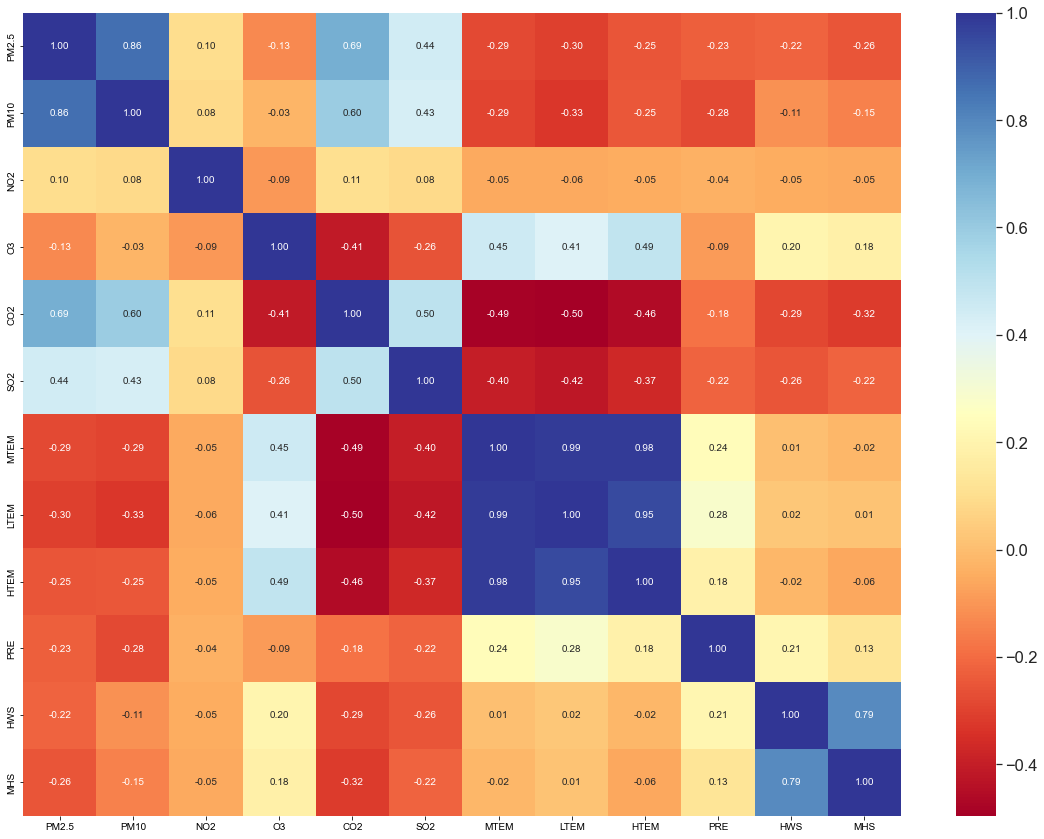

In [23]:
### 상관관계를 직관적으로 살펴보기 위해 Heatmap 으로 돌려봅니다.

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.set(font_scale = 1.5)  # heatmap 안의 font_scale: 폰트 사이즈. 기본값 1.5
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':10},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout()
plt.show()

위 상관 분석을 통해 가장 높은 연관성을 가진 미세먼지와 초미세먼지의 관계는 이번 회귀분석 (날씨,대기 오염 물질)의 목적과 맞지 않다고 생각되어 이후 회귀분석시 미세먼지는 제외하도록 결론을 내렸습니다.

또한 모든 날씨관련 속성들이 초미세먼지와 음의 상관관계를 지닌다는 것을 해당 분석을 통해 알 수 있었습니다.

아래는 몇가지 속성에 대한 산점도 분석입니다. 초미세먼지와 양의 상관관계인 CO2,SO2는 파란색, 음의 상관관계 중 가장 절대값이 큰  LTEM(최저기온)은 빨간색으로 표현하였습니다.

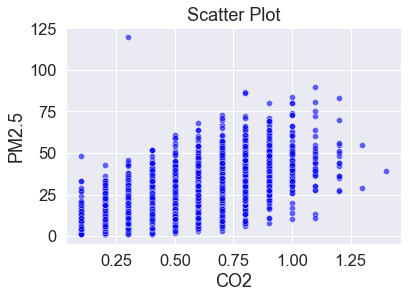

In [24]:
### scatter plot 산점도, https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df, x='CO2', y='PM2.5', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

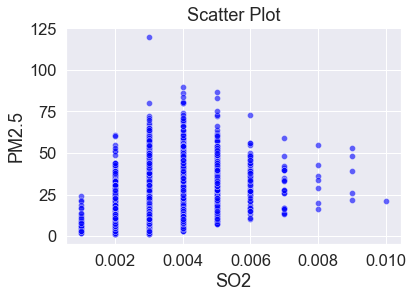

In [25]:
sns.scatterplot(data=df, x='SO2', y='PM2.5', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

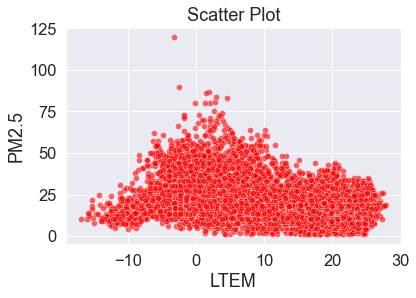

In [26]:
sns.scatterplot(data=df, x='LTEM', y='PM2.5', markers='o', color='red', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

산점도 분석의 결과 각 속성과 독립변수간의 관계가 직선 모양을 띄지 않고 분포 간격이 매우 넓은 것을 확인 할 수 있었습니다.

In [27]:
### 각 구의 데이터 갯수 살펴보기 
df['POS'].value_counts()

양천구     364
송파구     364
강북구     363
노원구     363
성동구     362
금천구     361
강동구     361
서초구     361
서대문구    360
관악구     360
영등포구    360
동대문구    360
성북구     359
중구      359
강남구     359
마포구     357
도봉구     357
중랑구     357
구로구     356
강서구     356
용산구     350
은평구     333
Name: POS, dtype: int64

<AxesSubplot:xlabel='PM2.5', ylabel='POS'>

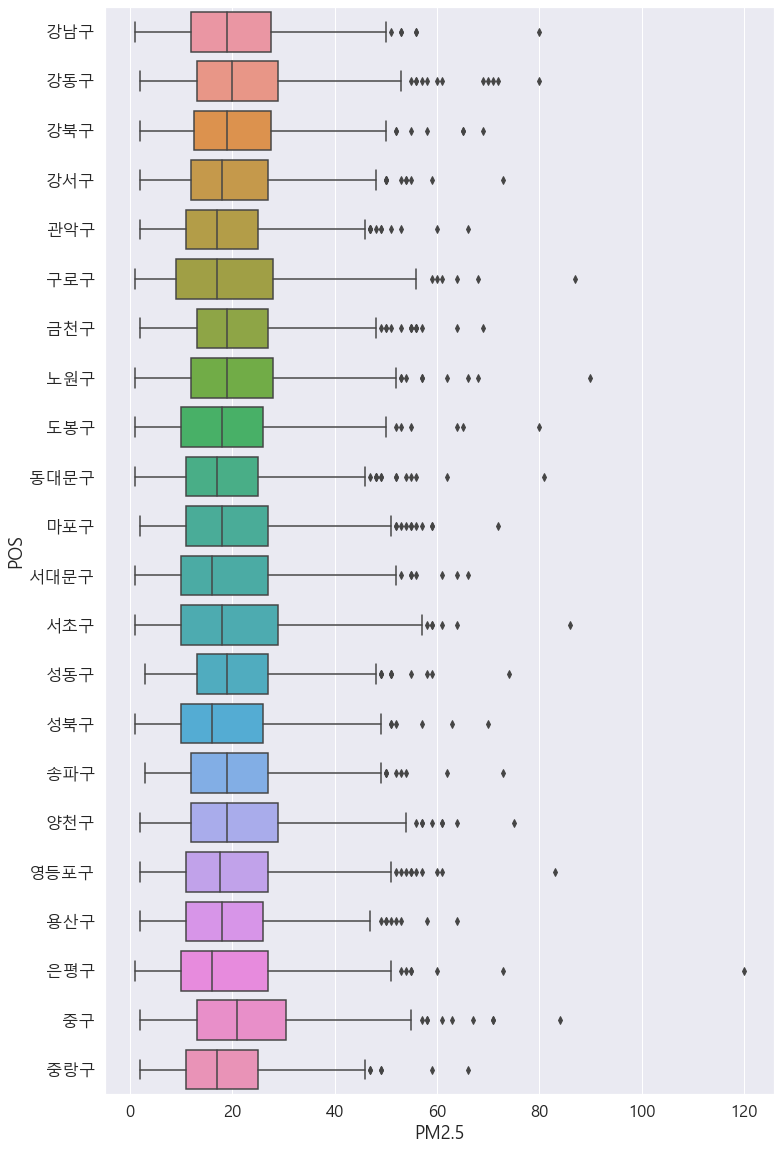

In [28]:
### 구별 초미세먼지 농도 특징 (boxplot 이용)
#폰트 설정을 진행합니다
plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize = (12, 20))
sns.boxplot(x='PM2.5', y='POS', data=df)

크게 특징되는 지역은 보이지 않고 모두 비슷한 모습을 볼 수 있었으나 은평구에서 120 최대값이 이상치 데이터로 보였습니다.

### 3. 미세먼지 예측 모델링: 회귀분석

이제 변수들을 활용하여 초미세먼지 농도를 예측하는 회귀 모델을 만들어 보겠습니다.

#### 3-1 데이터 전처리

먼저 Feature 들의 scale 차이를 없애기 위해 수치형 Feature에 대해서 표준화를 진행하였습니다.
회귀분석부터는 미세먼지 설명변수를 제외하였습니다.

In [29]:
### 문자형 변수를 제외하고 모든 수치형 변수에 대해서 표준화를 진행합니다.

from sklearn.preprocessing import StandardScaler

# 기존 데이터 프레임을 미리 담아둡니다.
prev_df = df

# feature standardization  (numerical_columns except dummy var.-"CHAS")

scaler = StandardScaler()  # 평균 0, 표준편차 1
scale_columns = [ 'PM2.5','NO2', 'O3', 'CO2' ,'SO2', 'MTEM', 'LTEM', 'HTEM', 'PRE', 'HWS' ,'MHS']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [30]:
df.head()

,DATE,POS,NO2,O3,CO2,SO2,PM10,PM2.5,MTEM,LTEM,HTEM,PRE,HWS,MHS
0,2020-01-01,강남구,0.168096,-1.780737,1.269982,-0.093142,30.0,0.106381,-1.575778,-1.453490,-1.784349,-0.299325,-1.428899,-0.957562
1,2020-01-01,강동구,0.154618,-1.622719,0.167802,-0.093142,35.0,0.504943,-1.680358,-1.534389,-1.887858,-0.299325,-0.953233,-0.824990
2,2020-01-01,강북구,0.275914,-1.701728,0.718892,-0.093142,40.0,0.425230,-1.628068,-1.534389,-1.836104,-0.299325,-1.309982,-0.957562
3,2020-01-01,강서구,0.208528,-1.701728,0.718892,2.082097,38.0,0.106381,-1.523488,-1.433266,-1.722244,-0.299325,-1.547815,-0.692417
4,2020-01-01,관악구,0.235482,-1.148666,0.718892,-0.093142,33.0,0.026669,-1.680358,-1.655736,-1.856805,-0.299325,-0.517206,-0.427271


In [31]:
df[scale_columns].head()

,PM2.5,NO2,O3,CO2,SO2,MTEM,LTEM,HTEM,PRE,HWS,MHS
0,0.106381,0.168096,-1.780737,1.269982,-0.093142,-1.575778,-1.453490,-1.784349,-0.299325,-1.428899,-0.957562
1,0.504943,0.154618,-1.622719,0.167802,-0.093142,-1.680358,-1.534389,-1.887858,-0.299325,-0.953233,-0.824990
2,0.425230,0.275914,-1.701728,0.718892,-0.093142,-1.628068,-1.534389,-1.836104,-0.299325,-1.309982,-0.957562
3,0.106381,0.208528,-1.701728,0.718892,2.082097,-1.523488,-1.433266,-1.722244,-0.299325,-1.547815,-0.692417
4,0.026669,0.235482,-1.148666,0.718892,-0.093142,-1.680358,-1.655736,-1.856805,-0.299325,-0.517206,-0.427271


+ training/test set 나누기

예측 모델의 예측 성능을 평가하기 위해, 먼저 전체 데이터셋을 "Training set"과 "Test set"으로 나누었습니다.
Training set에서 모델을 학습하고 Test set에서 모델의 예측 성능을 진행하도록 하고 2:8(test,training) 비율로 나누었습니다. 

In [32]:
from sklearn.model_selection import train_test_split

## numerical_columns에서 미세먼지(PM10)는 제외하고 예측 모델을 만들어냅니다. 
numerical_columns=['NO2', 'O3', 'CO2' ,'SO2', 'PM2.5','MTEM', 'LTEM', 'HTEM', 'PRE', 'HWS' ,'MHS']

# split dataset into training & test
X = df[numerical_columns]
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
X_train.shape, y_train.shape

((6305, 11), (6305,))

In [34]:
X_test.shape, y_test.shape

((1577, 11), (1577,))

In [35]:
y_train

7119   -0.053044
2787   -0.850167
1430    1.700628
3514    0.106381
6016   -0.451606
          ...   
919     1.142642
5299   -1.328442
4055    0.345518
235     1.541203
5264   -0.690743
Name: PM2.5, Length: 6305, dtype: float64

In [36]:
X_train

,NO2,O3,CO2,SO2,PM2.5,MTEM,LTEM,HTEM,PRE,HWS,MHS
7119,0.060277,-1.227675,-2.036558,-0.093142,-0.053044,-0.645018,-0.856866,-0.521548,-0.299325,-0.755039,-0.427271
2787,-0.020587,1.221600,-0.934378,0.994478,-0.850167,0.724977,0.538628,0.906866,-0.122157,-0.913594,-0.294698
1430,0.235482,0.115476,0.718892,-0.093142,1.700628,-0.435858,-0.846754,0.027046,-0.299325,-0.437928,-1.090135
3514,0.114186,0.431512,0.167802,-0.093142,0.106381,1.362914,1.317273,1.496864,0.232180,-1.191066,-1.620427
6016,-0.114928,1.063583,-0.934378,-0.093142,-0.451606,0.662230,0.801547,0.430728,-0.299325,0.790876,0.235594
...,...,...,...,...,...,...,...,...,...,...,...
919,0.437643,-1.306684,1.269982,0.994478,1.142642,-0.529980,-0.695070,-0.366286,-0.299325,-1.508177,-1.355281
5299,-0.101451,-0.674613,-0.934378,-1.180761,-1.328442,1.436120,1.398172,1.351952,-0.299325,-0.834316,-0.824990
4055,-0.141883,2.248716,-0.934378,-1.180761,0.345518,1.028259,0.953232,0.958621,-0.299325,-0.755039,-1.090135
235,0.275914,-1.227675,2.372162,0.994478,1.541203,-1.251581,-1.099561,-1.349615,-0.299325,-0.636122,-0.162125


이제 나눈 training/test set 에 대해 다중공산성을 확인해봅니다

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 
### 소수점 첫째자리까지 표시합니다. 즉, 소수점 둘째짜리에서 반올림 합니다.

,features,VIF Factor
0,NO2,3.4
1,O3,2.1
2,CO2,3.2
3,SO2,1.6
4,PM2.5,2.4
5,MTEM,301.5
6,LTEM,93.1
7,HTEM,88.6
8,PRE,1.3
9,HWS,3.0


VIF값을 확인해보면, 모든 온도 변수의 VIF값이 다 10 이상입니다. 

온도들 끼리 다중공선성을 가지고 있음을 미처 깨닫지 못했던 것입니다.

따라서 다중공선성 문제가 존재하는 온도 변수들 중 가장 상관관계가 큰 LTEM(최저기온)만 포함하고 나머지는 제외해 회귀 모델링을 진행하고자 합니다.

아래는 최저기온만을 포함한 트레이닝,테스트 세트입니다.

In [38]:
numerical_columns=['NO2', 'O3', 'CO2' ,'SO2', 'LTEM','PRE', 'HWS' ,'MHS']

X = df[numerical_columns]
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 

,features,VIF Factor
0,NO2,2.9
1,O3,1.6
2,CO2,2.6
3,SO2,1.5
4,LTEM,1.7
5,PRE,1.3
6,HWS,2.9
7,MHS,2.8


### 3-2 회귀모델링
먼저 Training set에서 선형 회귀 예측 모델을 학습합니다.

In [39]:
from sklearn import linear_model

# fit regression model in training set
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# predict in test set
pred_test = lr.predict(X_test)

In [40]:
### print coef 
### 계수를 출력합니다.
print(lr.coef_)

[ 2.28306927  0.24470605  0.48632084  0.09104113  0.06294942 -0.04993188
  0.07906106 -0.05559261]


In [41]:
### "feature - coefficients" DataFrame 만들기
### zip 키워드는 리스트 2개를 하나로 묶습니다.(결과는 튜플로 됩니다.)

coefs = pd.DataFrame(zip(df[numerical_columns].columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs


,feature,coefficients
0,NO2,2.283069
1,O3,0.244706
2,CO2,0.486321
3,SO2,0.091041
4,LTEM,0.062949
5,PRE,-0.049932
6,HWS,0.079061
7,MHS,-0.055593


In [42]:
# 절대값 순서대로 정렬
coefs_new = coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)
coefs_new

,feature,coefficients
0,NO2,2.283069
2,CO2,0.486321
1,O3,0.244706
3,SO2,0.091041
6,HWS,0.079061
4,LTEM,0.062949
7,MHS,-0.055593
5,PRE,-0.049932


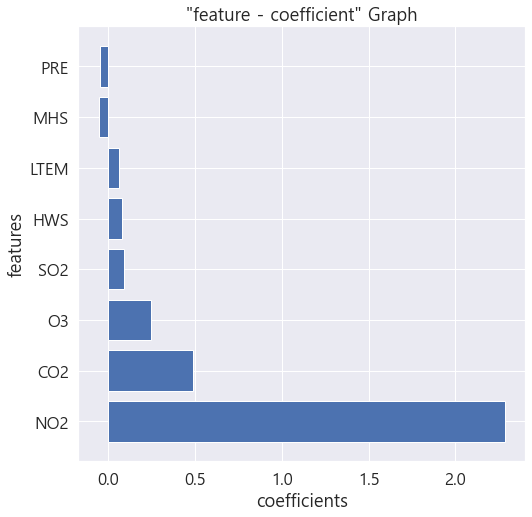

In [43]:
### coefficients 를 시각화 합니다. 

### figure size
plt.figure(figsize = (8, 8))

plt.barh(coefs_new['feature'], coefs_new['coefficients'])
plt.title('"feature - coefficient" Graph')
plt.xlabel('coefficients')
plt.ylabel('features')
plt.show()

시각화된 그래프로 확인해본 결과 모든 대기 오염 물질 속성들이 날씨보다 연관이 높은 것을 확인 할 수 있었습니다.

In [44]:
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

E:\Anadonda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     1074.
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:51:34   Log-Likelihood:                -6194.7
No. Observations:                6305   AIC:                         1.241e+04
Df Residuals:                    6296   BIC:                         1.247e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.008      2.992      0.003       0.008       0.041
NO2            2.2831      0.085     26.906      0.000       2.117       2.449
O3             0.2447      0.010     23.950      0.000       0.225       0.265
CO2            0.4863      0.013     36.869      0.000       0.460       0.512
SO2            0.0910      0.010      9.023      0.000       0.071       0.111
LTEM           0.0629      0.011      5.887      0.000       0.042       0.084
PRE           -0.0499      0.009     -5.559      0.000      -0.068      -0.032
HWS            0.0791      0.014      5.694      0.000       0.052       0.106
MHS           -0.0556      0.013     -4.125      0.000      -0.082      -0.029
==============================================================================
Omnibus:                     1054.816   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2411.104
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                       5.341   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 모델 결과 해석

NO2,O3,CO2,SO2 모든 대기 오염 물질들은 양의 상관관계를 가지고 있습니다.
또한 LTEM(최저기온),HWS(최대순간풍속)도 양의 상관관계를 가집니다.

PRE(일강수량),MHS(평균풍속)의 경우 음의 상관관계를 가집니다.

In [45]:
### 예측 결과 시각화 (test set)
df = pd.DataFrame({'actual': y_test, 'prediction': pred_test})
df = df.sort_values(by='actual').reset_index(drop=True)
df.head()

,actual,prediction
0,-1.567579,-0.461295
1,-1.567579,-0.922303
2,-1.567579,-1.121751
3,-1.567579,-1.259729
4,-1.567579,-1.147720


#### 3-4 모델 에측 결과 및 성능 평가 : 예측결과를 가시화 합니다.

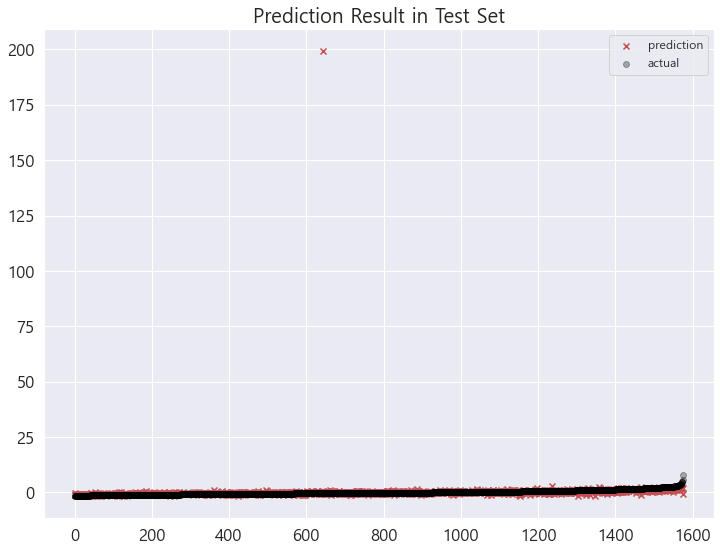

In [46]:
plt.figure(figsize=(12, 9))
plt.scatter(df.index, df['prediction'], marker='x', color='r')
plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
plt.title("Prediction Result in Test Set", fontsize=20)
plt.legend(['prediction', 'actual'], fontsize=12)
plt.show()

하나의 이상치 예측 데이터를 제외하고 상당히 비슷한 예측을 보이는 것 같습니다.

In [47]:
### R square
print(model.score(X_train, y_train))  # training set
print(model.score(X_test, y_test))  # test set

0.577151321464408
-23.526712693399286


In [48]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# training set
pred_train = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, pred_train)))

# test set
print(sqrt(mean_squared_error(y_test, pred_test)))

0.6463342305108799
5.0703370820815525


In [49]:
### 해설) Test set에서 해당 예측 모델의 R square가 0.57이고, RMSE가 5.07입니다.

이제 테스트 사이즈를 변경하여 예측을 진행해보겠습니다.

In [51]:
df = prev_df

numerical_columns=['NO2', 'O3', 'CO2' ,'SO2', 'LTEM','PRE', 'HWS' ,'MHS']

X = df[numerical_columns]
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()


E:\Anadonda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     944.3
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:51:35   Log-Likelihood:                -5419.1
No. Observations:                5517   AIC:                         1.086e+04
Df Residuals:                    5508   BIC:                         1.092e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0252      0.009      2.872      0.004       0.008       0.042
NO2            2.3224      0.091     25.522      0.000       2.144       2.501
O3             0.2490      0.011     22.841      0.000       0.228       0.270
CO2            0.4837      0.014     34.127      0.000       0.456       0.512
SO2            0.0868      0.011      8.088      0.000       0.066       0.108
LTEM           0.0600      0.011      5.226      0.000       0.037       0.083
PRE           -0.0509      0.010     -5.216      0.000      -0.070      -0.032
HWS            0.0788      0.015      5.314      0.000       0.050       0.108
MHS           -0.0597      0.014     -4.153      0.000      -0.088      -0.032
==============================================================================
Omnibus:                      950.822   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2270.468
Skew:                           0.971   Prob(JB):                         0.00
Kurtosis:                       5.471   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df = prev_df

numerical_columns=['NO2', 'O3', 'CO2' ,'SO2', 'LTEM','PRE', 'HWS' ,'MHS']

X = df[numerical_columns]
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

X_train2 = sm.add_constant(X_train)

model2 = sm.OLS(y_train, X_train2).fit()
model2.summary()

E:\Anadonda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2.5   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     792.7
Date:                Sun, 27 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:51:36   Log-Likelihood:                -4693.3
No. Observations:                4729   AIC:                             9405.
Df Residuals:                    4720   BIC:                             9463.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0238      0.010      2.486      0.013       0.005       0.043
NO2            2.3773      0.100     23.841      0.000       2.182       2.573
O3             0.2546      0.012     21.141      0.000       0.231       0.278
CO2            0.4793      0.015     31.205      0.000       0.449       0.509
SO2            0.0803      0.012      6.893      0.000       0.057       0.103
LTEM           0.0564      0.013      4.473      0.000       0.032       0.081
PRE           -0.0496      0.011     -4.634      0.000      -0.071      -0.029
HWS            0.0733      0.016      4.529      0.000       0.042       0.105
MHS           -0.0537      0.016     -3.440      0.001      -0.084      -0.023
==============================================================================
Omnibus:                      832.543   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2044.029
Skew:                           0.979   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

비교 결과 테스트 셋이 0.3인 경우 가장 높은 R-squared 값을 볼 수 있었습니다.

### 서울시 구별 초미세먼지 농도 회귀분석 결과


**1. 초미세먼지 농도는 날씨적 요인보다는 대기 오염 물질 농도가 더 원인이 된다.**

 앞서 본 coefficients 시각화 그래프에서 모든 대기 오염 물질 농도가 초미세먼지에 날씨보다 영향을 큰 미치고 그중 실제 초미세먼지의 주 물질인 질소화합물의 주요 성분인 질소가 포함된 NO2가 가장 높은 연관성을 가진 것을 결과로 확인 할 수 있었습니다.


**2. 산포도가 넓은 속성들의 영향으로 낮은 결정계수가 나왔을 것 이다.**

회귀분석에 앞서 실시한 상관분석에서 최저온도의 경우 음의 상관관계로 표현되었지만 그 그래프를 확인하면 방향성을 쉽게 확인하기 어려웠습니다. 그리고 이후 회귀분석의 결과에서는 coefficients가 양의 상관관계로 확인이 되었습니다. 이와같은 결과는 속성에 대한 타겟 변수의 산포도가 넓어 특정값을 예측하기 어려웠을 것이라는 생각이 들었습니다.


따라서, 이번 분석을 통해 이후 날씨 요인보다 대기 오염 물질의 직접적인 제공원이 되는 공장 시설에 대한 데이터셋을 이용해 회귀분석을 진행하면 더 높은 정확도의 회귀분석 결과가 나오지 않을까라는 생각을 할 수 있었습니다.